<a href="https://colab.research.google.com/github/Sang0031/portfolio/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing of python libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


load the date set of wine  from scikit

In [ ]:
# Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Check shape and head
print(f"Shape of dataset: {X.shape}")
X.head()


Shape of dataset: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


exploring the data set
generating  a bar chart showing the distribution of wine classes in the dataset,
  helping visualize how many samples belong to each target class.

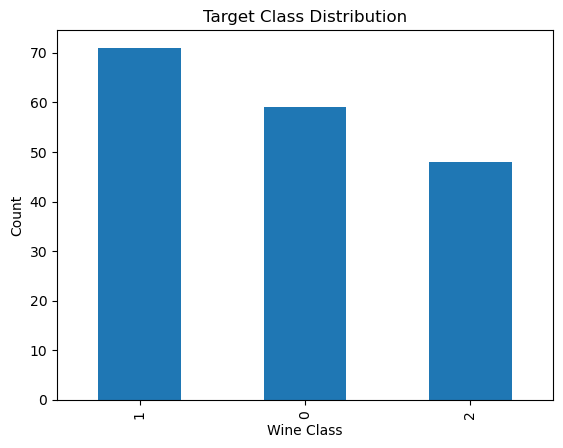

In [ ]:
y.value_counts().plot(kind='bar', title='Target Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()


preparint the data
checking  for missing values in the feature dataset X, scales the features using StandardScaler, and splits the scaled data into training and testing sets using a 70-30 split.

In [ ]:
# Check for missing values
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


BUILD OF THE MODELS
training of  six different classification models on the training set, evaluates them on the test set using accuracy, classification report, and confusion matrix

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': acc,
        'classification_report': clf_report,
        'confusion_matrix': cm,
        'y_pred': y_pred
    }


evaluation of the model
it  printing the model name, accuracy, and classification report, and then displays a confusion matrix plot for each model to visually show how well it predicted the wine classes.

Model: Logistic Regression
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  19.000000
1              1.000000  0.952381  0.975610  21.000000
2              0.933333  1.000000  0.965517  14.000000
accuracy       0.981481  0.981481  0.981481   0.981481
macro avg      0.977778  0.984127  0.980376  54.000000
weighted avg   0.982716  0.981481  0.981575  54.000000


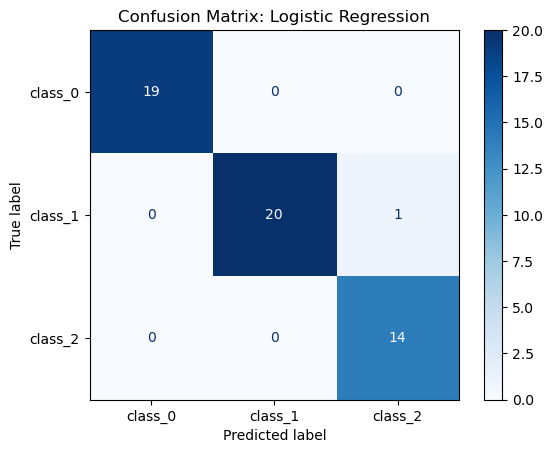

Model: Decision Tree
Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score    support
0              1.000000  0.894737  0.944444  19.000000
1              0.875000  1.000000  0.933333  21.000000
2              1.000000  0.928571  0.962963  14.000000
accuracy       0.944444  0.944444  0.944444   0.944444
macro avg      0.958333  0.941103  0.946914  54.000000
weighted avg   0.951389  0.944444  0.944925  54.000000


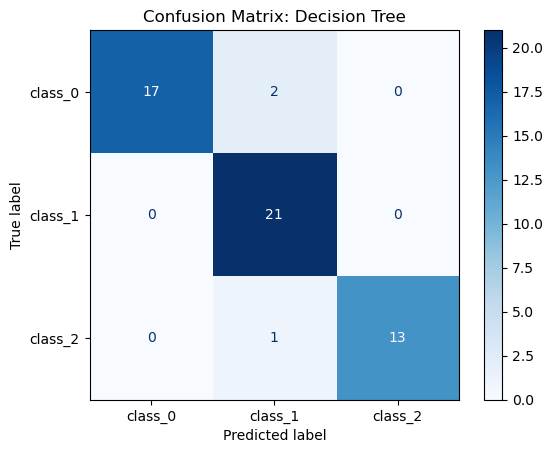

Model: Random Forest
Accuracy: 1.0000
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     19.0
1                   1.0     1.0       1.0     21.0
2                   1.0     1.0       1.0     14.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     54.0
weighted avg        1.0     1.0       1.0     54.0


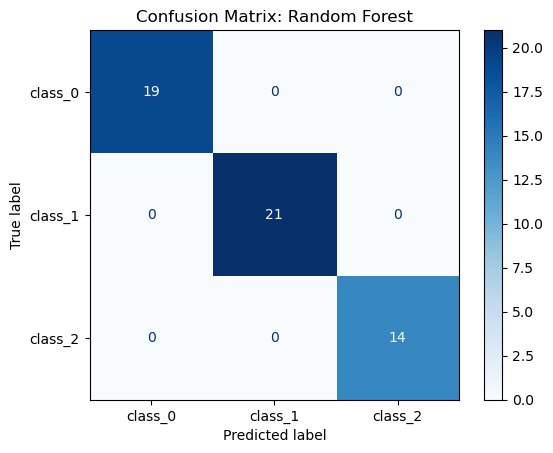

Model: KNN
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score    support
0              0.950000  1.000000  0.974359  19.000000
1              1.000000  0.904762  0.950000  21.000000
2              0.933333  1.000000  0.965517  14.000000
accuracy       0.962963  0.962963  0.962963   0.962963
macro avg      0.961111  0.968254  0.963292  54.000000
weighted avg   0.965123  0.962963  0.962594  54.000000


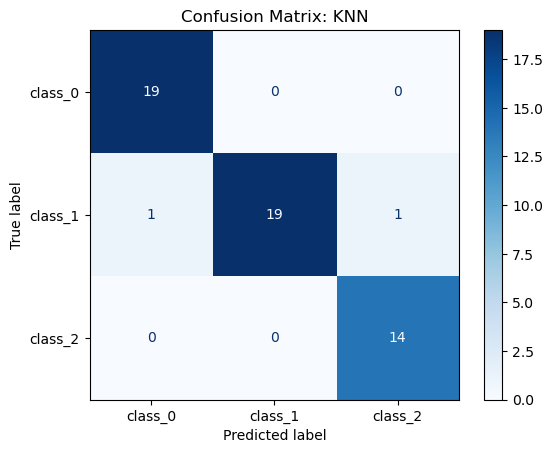

Model: Naive Bayes
Accuracy: 1.0000
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     19.0
1                   1.0     1.0       1.0     21.0
2                   1.0     1.0       1.0     14.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     54.0
weighted avg        1.0     1.0       1.0     54.0


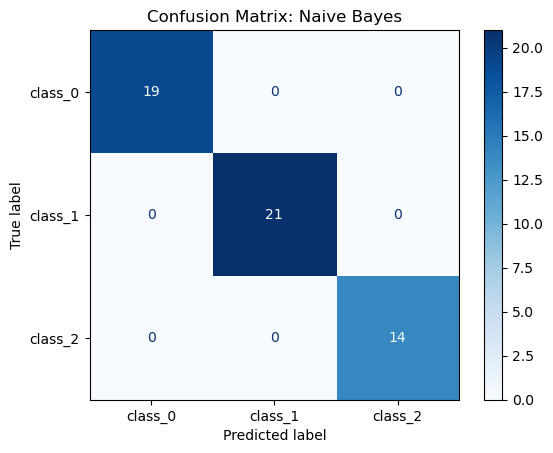

Model: SVM
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  19.000000
1              0.954545  1.000000  0.976744  21.000000
2              1.000000  0.928571  0.962963  14.000000
accuracy       0.981481  0.981481  0.981481   0.981481
macro avg      0.984848  0.976190  0.979902  54.000000
weighted avg   0.982323  0.981481  0.981354  54.000000


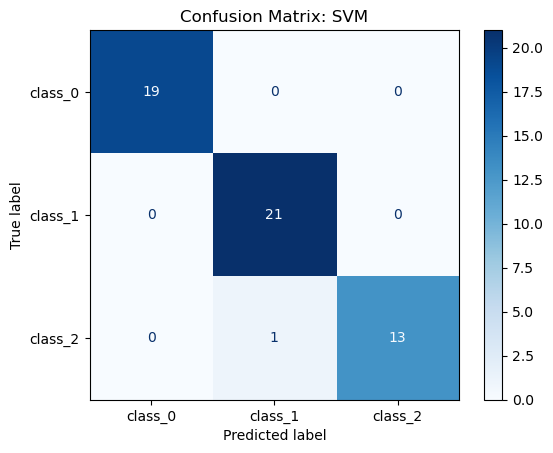

In [ ]:
for name, res in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(res['classification_report']).transpose())

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=res['confusion_matrix'], display_labels=wine.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


compariring the models

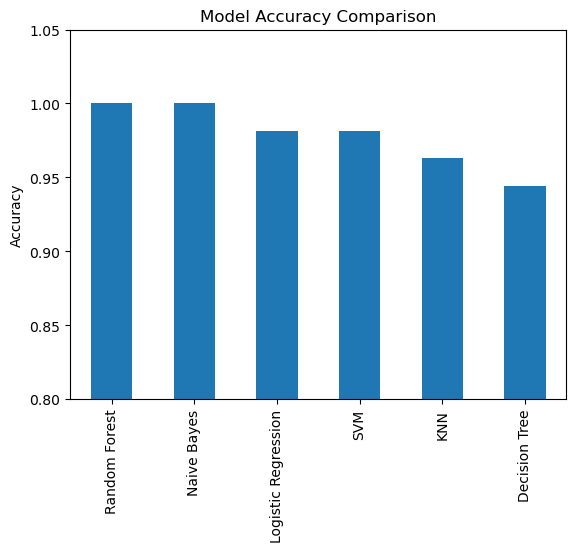

In [ ]:
accuracy_df = pd.DataFrame({k: v['accuracy'] for k, v in results.items()}, index=['Accuracy']).T
accuracy_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', legend=False, title='Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.05)
plt.show()


The bar chartaboveon the Model Accuracy Comparison visually compares the performance of six classification models based on their accuracy. From the chart, Random Forest and Naive Bayes achieved the highest accuracy, both reaching perfect classification on the test data. Logistic Regression and SVM also performed strongly, with accuracy scores slightly below the top models. KNN and Decision Tree had comparatively lower accuracy, with Decision Tree being the least accurate among the six. This visualization clearly highlights how ensemble and probabilistic models like Random Forest and Naive Bayes can outperform simpler or more sensitive models on structured datasets like Wine.


In [ ]:
for name, res in results.items():
    print(f"{name}: Accuracy = {res['accuracy']:.4f}")


Logistic Regression: Accuracy = 0.9815
Decision Tree: Accuracy = 0.9444
Random Forest: Accuracy = 1.0000
KNN: Accuracy = 0.9630
Naive Bayes: Accuracy = 1.0000
SVM: Accuracy = 0.9815
